## Compare Resistant vs Susceptible MCAV Corals 

#### Installation

In [117]:
install.packages("remotes")
remotes::install_github("vegandevs/vegan")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'vegan' from a github remote, the SHA1 (003391b9) has not changed since last install.
  Use `force = TRUE` to force installation



In [14]:
# Get the current working directory
current_directory <- getwd()
print(paste("Current Working Directory:", current_directory))

[1] "Current Working Directory: /project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/CBC_metagenomics/mcav1"


In [1]:
# Set a new working directory
new_directory <- "//project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav_taxonomy/kraken"
setwd(new_directory)

# Check if the working directory has been changed
current_directory <- getwd()
print(paste("New Working Directory:", current_directory))


[1] "New Working Directory: /project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav_taxonomy/kraken"


In [40]:
install.packages('ecodist')

also installing the dependency ‘igraph’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
install.packages('tidyverse')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
install.packages('ggvegan')

Warning message:
“package ‘ggvegan’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [6]:
install.packages('phyloseq')

Warning message:
“package ‘phyloseq’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [8]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("phyloseq")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'phyloseq'

also installing the dependencies ‘bitops’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘pixmap’, ‘sp’, ‘Rcpp’, ‘RcppArmadillo’, ‘rhdf5’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘GenomeInfoDb’, ‘codetools’, ‘iterators’, ‘survival’, ‘ade4’, ‘ape’, ‘Biobase’, ‘BiocGenerics’, ‘biomformat’, ‘Biostrings’, ‘foreach’, ‘igraph’, ‘multtest’, ‘plyr’, ‘reshape2’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'curl'



#### Begin Coding

In [85]:
library(tidyverse)
library(vegan)
library(phyloseq)

In [86]:
# Load otu..not using taxa table 

In [87]:
otu = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/11272023/taxonomy/kraken/otu_sort.csv',header=FALSE)
head(otu)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,otu,102019_BEL_CBC_T1_26_PSTR,102019_BEL_CBC_T3_38_PSTR,052022_BEL_CBC_T1_55_PSTR,102019_BEL_CBC_T3_37_PSTR,102019_BEL_CBC_T2_32_PSTR,052022_BEL_CBC_T2_13_PSTR,102019_BEL_CBC_T1_29_PSTR,102019_BEL_CBC_T3_40_PSTR,102019_BEL_CBC_T3_35_PSTR,⋯,102019_BEL_CBC_T3_34_PSTR,102019_BEL_CBC_T2_31_PSTR,052022_BEL_CBC_T3_15_PSTR,102019_BEL_CBC_T3_36_PSTR,102019_BEL_CBC_T2_33_PSTR,102019_BEL_CBC_T1_28_PSTR,102019_BEL_CBC_T2_36_PSTR,052022_BEL_CBC_T2_45_PSTR,102019_BEL_CBC_T1_27_PSTR,102019_BEL_CBC_T3_39_PSTR
2,Clostridioides,34167.48692980695,44300.29495305375,125564.31946783561,42199.19021673145,116086.49176101816,29302.18109538187,124615.3287390547,44252.769250907244,123030.27075286735,⋯,127808.00076129683,42032.10079588572,46758.75249984975,125699.49999737847,117414.83061376179,47950.80608239824,45023.94647254552,45454.539921626645,42718.75328643413,124728.52774722988
3,Bacillus,4152.972100081164,4871.280628529513,410.9550629152194,4515.252261148555,600.0930548527631,3781.6047120546655,337.4824677743539,2447.4964394567305,411.35239457049823,⋯,377.65991758565224,4390.658826299522,2629.714464214172,403.7131275267894,507.2137230448426,2565.0191711077355,4642.205832585387,4304.918830845419,4344.01628993197,391.42345694128903
4,Vibrio,1639.4695446576704,2732.792642008058,56.3979244666125,2494.7843357363236,82.33239865658581,1237.172985083919,54.21999584003071,827.8355352679281,47.931991990896265,⋯,41.9197882584428,3806.065601421982,750.0814760730934,64.62677333279417,82.73686801129163,947.5024040237511,1765.7053068748119,1521.1063497557827,1432.5866942357536,44.545796231959734
5,Populus,209.84076990989934,220.4280769998832,72.99908884638774,279.9501532969944,77.17382967064358,62.37914796620374,62.613184050561784,255.89006951367838,88.59262808321456,⋯,68.10405256560816,293.7539768623755,241.04584629411107,69.99546607265793,104.89945268070512,195.81231569878412,223.92444985265698,243.28612854799204,236.21976585514622,68.97780181836622
6,Blastomyces,257.39388555968367,223.7473859746438,57.894043266869545,161.0958613388976,75.39289513978258,61.45112700681002,36.41117649150388,401.2427513725742,103.72490927755247,⋯,41.383767143910255,141.3009854191323,197.7882870126173,41.706853612413575,97.24469764902905,115.73636425511913,156.30042013672622,243.9150369856995,184.37924331300837,184.8451678464579


In [88]:
# was changing the headers, so manually adding them
colnames(otu) <- otu[1,]
# remove first line
otu <- otu[-1, ]
head(otu)

,otu,102019_BEL_CBC_T1_26_PSTR,102019_BEL_CBC_T3_38_PSTR,052022_BEL_CBC_T1_55_PSTR,102019_BEL_CBC_T3_37_PSTR,102019_BEL_CBC_T2_32_PSTR,052022_BEL_CBC_T2_13_PSTR,102019_BEL_CBC_T1_29_PSTR,102019_BEL_CBC_T3_40_PSTR,102019_BEL_CBC_T3_35_PSTR,⋯,102019_BEL_CBC_T3_34_PSTR,102019_BEL_CBC_T2_31_PSTR,052022_BEL_CBC_T3_15_PSTR,102019_BEL_CBC_T3_36_PSTR,102019_BEL_CBC_T2_33_PSTR,102019_BEL_CBC_T1_28_PSTR,102019_BEL_CBC_T2_36_PSTR,052022_BEL_CBC_T2_45_PSTR,102019_BEL_CBC_T1_27_PSTR,102019_BEL_CBC_T3_39_PSTR
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,Clostridioides,34167.48692980695,44300.29495305375,125564.31946783561,42199.19021673145,116086.49176101816,29302.18109538187,124615.3287390547,44252.769250907244,123030.27075286735,⋯,127808.00076129683,42032.10079588572,46758.75249984975,125699.49999737847,117414.83061376179,47950.80608239824,45023.94647254552,45454.539921626645,42718.75328643413,124728.52774722988
3,Bacillus,4152.972100081164,4871.280628529513,410.9550629152194,4515.252261148555,600.0930548527631,3781.6047120546655,337.4824677743539,2447.4964394567305,411.35239457049823,⋯,377.65991758565224,4390.658826299522,2629.714464214172,403.7131275267894,507.2137230448426,2565.0191711077355,4642.205832585387,4304.918830845419,4344.01628993197,391.42345694128903
4,Vibrio,1639.4695446576704,2732.792642008058,56.3979244666125,2494.7843357363236,82.33239865658581,1237.172985083919,54.21999584003071,827.8355352679281,47.931991990896265,⋯,41.9197882584428,3806.065601421982,750.0814760730934,64.62677333279417,82.73686801129163,947.5024040237511,1765.7053068748119,1521.1063497557827,1432.5866942357536,44.545796231959734
5,Populus,209.84076990989934,220.4280769998832,72.99908884638774,279.9501532969944,77.17382967064358,62.37914796620374,62.613184050561784,255.89006951367838,88.59262808321456,⋯,68.10405256560816,293.7539768623755,241.04584629411107,69.99546607265793,104.89945268070512,195.81231569878412,223.92444985265698,243.28612854799204,236.21976585514622,68.97780181836622
6,Blastomyces,257.39388555968367,223.7473859746438,57.894043266869545,161.0958613388976,75.39289513978258,61.45112700681002,36.41117649150388,401.2427513725742,103.72490927755247,⋯,41.383767143910255,141.3009854191323,197.7882870126173,41.706853612413575,97.24469764902905,115.73636425511913,156.30042013672622,243.9150369856995,184.37924331300837,184.8451678464579
7,Brassica,233.65105334872752,137.11156737083672,21.29092138827326,109.96567507861886,51.31957320538554,233.17535323201253,16.420128208238967,44.65541773421268,25.08617785009392,⋯,19.84746674769152,107.65487633502502,68.29172124865613,18.535603672741555,29.507011794400004,72.48429749277629,208.77102473616048,184.14844803453332,219.53137846144432,37.27301317368059


In [89]:
# Set OTUID as row names
rownames(otu) <- otu$otu  

head(otu)
dim(otu)

,otu,102019_BEL_CBC_T1_26_PSTR,102019_BEL_CBC_T3_38_PSTR,052022_BEL_CBC_T1_55_PSTR,102019_BEL_CBC_T3_37_PSTR,102019_BEL_CBC_T2_32_PSTR,052022_BEL_CBC_T2_13_PSTR,102019_BEL_CBC_T1_29_PSTR,102019_BEL_CBC_T3_40_PSTR,102019_BEL_CBC_T3_35_PSTR,⋯,102019_BEL_CBC_T3_34_PSTR,102019_BEL_CBC_T2_31_PSTR,052022_BEL_CBC_T3_15_PSTR,102019_BEL_CBC_T3_36_PSTR,102019_BEL_CBC_T2_33_PSTR,102019_BEL_CBC_T1_28_PSTR,102019_BEL_CBC_T2_36_PSTR,052022_BEL_CBC_T2_45_PSTR,102019_BEL_CBC_T1_27_PSTR,102019_BEL_CBC_T3_39_PSTR
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Clostridioides,Clostridioides,34167.48692980695,44300.29495305375,125564.31946783561,42199.19021673145,116086.49176101816,29302.18109538187,124615.3287390547,44252.769250907244,123030.27075286735,⋯,127808.00076129683,42032.10079588572,46758.75249984975,125699.49999737847,117414.83061376179,47950.80608239824,45023.94647254552,45454.539921626645,42718.75328643413,124728.52774722988
Bacillus,Bacillus,4152.972100081164,4871.280628529513,410.9550629152194,4515.252261148555,600.0930548527631,3781.6047120546655,337.4824677743539,2447.4964394567305,411.35239457049823,⋯,377.65991758565224,4390.658826299522,2629.714464214172,403.7131275267894,507.2137230448426,2565.0191711077355,4642.205832585387,4304.918830845419,4344.01628993197,391.42345694128903
Vibrio,Vibrio,1639.4695446576704,2732.792642008058,56.3979244666125,2494.7843357363236,82.33239865658581,1237.172985083919,54.21999584003071,827.8355352679281,47.931991990896265,⋯,41.9197882584428,3806.065601421982,750.0814760730934,64.62677333279417,82.73686801129163,947.5024040237511,1765.7053068748119,1521.1063497557827,1432.5866942357536,44.545796231959734
Populus,Populus,209.84076990989934,220.4280769998832,72.99908884638774,279.9501532969944,77.17382967064358,62.37914796620374,62.613184050561784,255.89006951367838,88.59262808321456,⋯,68.10405256560816,293.7539768623755,241.04584629411107,69.99546607265793,104.89945268070512,195.81231569878412,223.92444985265698,243.28612854799204,236.21976585514622,68.97780181836622
Blastomyces,Blastomyces,257.39388555968367,223.7473859746438,57.894043266869545,161.0958613388976,75.39289513978258,61.45112700681002,36.41117649150388,401.2427513725742,103.72490927755247,⋯,41.383767143910255,141.3009854191323,197.7882870126173,41.706853612413575,97.24469764902905,115.73636425511913,156.30042013672622,243.9150369856995,184.37924331300837,184.8451678464579
Brassica,Brassica,233.65105334872752,137.11156737083672,21.29092138827326,109.96567507861886,51.31957320538554,233.17535323201253,16.420128208238967,44.65541773421268,25.08617785009392,⋯,19.84746674769152,107.65487633502502,68.29172124865613,18.535603672741555,29.507011794400004,72.48429749277629,208.77102473616048,184.14844803453332,219.53137846144432,37.27301317368059


[1] 9368   34

In [90]:
# Remove the first column (OTUID)
otu$otu=NULL
head(otu)
tail(otu)

,102019_BEL_CBC_T1_26_PSTR,102019_BEL_CBC_T3_38_PSTR,052022_BEL_CBC_T1_55_PSTR,102019_BEL_CBC_T3_37_PSTR,102019_BEL_CBC_T2_32_PSTR,052022_BEL_CBC_T2_13_PSTR,102019_BEL_CBC_T1_29_PSTR,102019_BEL_CBC_T3_40_PSTR,102019_BEL_CBC_T3_35_PSTR,102019_BEL_CBC_T2_30_PSTR,⋯,102019_BEL_CBC_T3_34_PSTR,102019_BEL_CBC_T2_31_PSTR,052022_BEL_CBC_T3_15_PSTR,102019_BEL_CBC_T3_36_PSTR,102019_BEL_CBC_T2_33_PSTR,102019_BEL_CBC_T1_28_PSTR,102019_BEL_CBC_T2_36_PSTR,052022_BEL_CBC_T2_45_PSTR,102019_BEL_CBC_T1_27_PSTR,102019_BEL_CBC_T3_39_PSTR
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Clostridioides,34167.48692980695,44300.29495305375,125564.31946783561,42199.19021673145,116086.49176101816,29302.18109538187,124615.3287390547,44252.769250907244,123030.27075286735,124279.52444271363,⋯,127808.00076129683,42032.10079588572,46758.75249984975,125699.49999737847,117414.83061376179,47950.80608239824,45023.94647254552,45454.539921626645,42718.75328643413,124728.52774722988
Bacillus,4152.972100081164,4871.280628529513,410.9550629152194,4515.252261148555,600.0930548527631,3781.6047120546655,337.4824677743539,2447.4964394567305,411.35239457049823,366.3892228993057,⋯,377.65991758565224,4390.658826299522,2629.714464214172,403.7131275267894,507.2137230448426,2565.0191711077355,4642.205832585387,4304.918830845419,4344.01628993197,391.42345694128903
Vibrio,1639.4695446576704,2732.792642008058,56.3979244666125,2494.7843357363236,82.33239865658581,1237.172985083919,54.21999584003071,827.8355352679281,47.931991990896265,41.024053146678156,⋯,41.9197882584428,3806.065601421982,750.0814760730934,64.62677333279417,82.73686801129163,947.5024040237511,1765.7053068748119,1521.1063497557827,1432.5866942357536,44.545796231959734
Populus,209.84076990989934,220.4280769998832,72.99908884638774,279.9501532969944,77.17382967064358,62.37914796620374,62.613184050561784,255.89006951367838,88.59262808321456,93.5186854291645,⋯,68.10405256560816,293.7539768623755,241.04584629411107,69.99546607265793,104.89945268070512,195.81231569878412,223.92444985265698,243.28612854799204,236.21976585514622,68.97780181836622
Blastomyces,257.39388555968367,223.7473859746438,57.894043266869545,161.0958613388976,75.39289513978258,61.45112700681002,36.41117649150388,401.2427513725742,103.72490927755247,62.88046852215171,⋯,41.383767143910255,141.3009854191323,197.7882870126173,41.706853612413575,97.24469764902905,115.73636425511913,156.30042013672622,243.9150369856995,184.37924331300837,184.8451678464579
Brassica,233.65105334872752,137.11156737083672,21.29092138827326,109.96567507861886,51.31957320538554,233.17535323201253,16.420128208238967,44.65541773421268,25.08617785009392,23.541228809908144,⋯,19.84746674769152,107.65487633502502,68.29172124865613,18.535603672741555,29.507011794400004,72.48429749277629,208.77102473616048,184.14844803453332,219.53137846144432,37.27301317368059


,102019_BEL_CBC_T1_26_PSTR,102019_BEL_CBC_T3_38_PSTR,052022_BEL_CBC_T1_55_PSTR,102019_BEL_CBC_T3_37_PSTR,102019_BEL_CBC_T2_32_PSTR,052022_BEL_CBC_T2_13_PSTR,102019_BEL_CBC_T1_29_PSTR,102019_BEL_CBC_T3_40_PSTR,102019_BEL_CBC_T3_35_PSTR,102019_BEL_CBC_T2_30_PSTR,⋯,102019_BEL_CBC_T3_34_PSTR,102019_BEL_CBC_T2_31_PSTR,052022_BEL_CBC_T3_15_PSTR,102019_BEL_CBC_T3_36_PSTR,102019_BEL_CBC_T2_33_PSTR,102019_BEL_CBC_T1_28_PSTR,102019_BEL_CBC_T2_36_PSTR,052022_BEL_CBC_T2_45_PSTR,102019_BEL_CBC_T1_27_PSTR,102019_BEL_CBC_T3_39_PSTR
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Kurtzmanomyces,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pseudobensingtonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sterigmatomyces,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mycogloea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s3t2d-1089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acanthophysellum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# Convert to matrix
#otu_matrix=as.matrix(otu)
class(otus) <- "numeric"

# Replace NAs with 0
#otus[is.na(otus)] <- 0

# Print the modified data frame
head(otus)

,102019_BEL_CBC_T1_26_PSTR,102019_BEL_CBC_T3_38_PSTR,052022_BEL_CBC_T1_55_PSTR,102019_BEL_CBC_T3_37_PSTR,102019_BEL_CBC_T2_32_PSTR,052022_BEL_CBC_T2_13_PSTR,102019_BEL_CBC_T1_29_PSTR,102019_BEL_CBC_T3_40_PSTR,102019_BEL_CBC_T3_35_PSTR,102019_BEL_CBC_T2_30_PSTR,⋯,102019_BEL_CBC_T3_34_PSTR,102019_BEL_CBC_T2_31_PSTR,052022_BEL_CBC_T3_15_PSTR,102019_BEL_CBC_T3_36_PSTR,102019_BEL_CBC_T2_33_PSTR,102019_BEL_CBC_T1_28_PSTR,102019_BEL_CBC_T2_36_PSTR,052022_BEL_CBC_T2_45_PSTR,102019_BEL_CBC_T1_27_PSTR,102019_BEL_CBC_T3_39_PSTR
Clostridioides,34167.4869,44300.2950,125564.31947,42199.1902,116086.49176,29302.18110,124615.32874,44252.76925,123030.27075,124279.52444,⋯,127808.00076,42032.1008,46758.75250,125699.50000,117414.83061,47950.8061,45023.9465,45454.5399,42718.7533,124728.52775
Bacillus,4152.9721,4871.2806,410.95506,4515.2523,600.09305,3781.60471,337.48247,2447.49644,411.35239,366.38922,⋯,377.65992,4390.6588,2629.71446,403.71313,507.21372,2565.0192,4642.2058,4304.9188,4344.0163,391.42346
Vibrio,1639.4695,2732.7926,56.39792,2494.7843,82.33240,1237.17299,54.22000,827.83554,47.93199,41.02405,⋯,41.91979,3806.0656,750.08148,64.62677,82.73687,947.5024,1765.7053,1521.1063,1432.5867,44.54580
Populus,209.8408,220.4281,72.99909,279.9502,77.17383,62.37915,62.61318,255.89007,88.59263,93.51869,⋯,68.10405,293.7540,241.04585,69.99547,104.89945,195.8123,223.9244,243.2861,236.2198,68.97780
Blastomyces,257.3939,223.7474,57.89404,161.0959,75.39290,61.45113,36.41118,401.24275,103.72491,62.88047,⋯,41.38377,141.3010,197.78829,41.70685,97.24470,115.7364,156.3004,243.9150,184.3792,184.84517
Brassica,233.6511,137.1116,21.29092,109.9657,51.31957,233.17535,16.42013,44.65542,25.08618,23.54123,⋯,19.84747,107.6549,68.29172,18.53560,29.50701,72.4843,208.7710,184.1484,219.5314,37.27301


In [92]:
meta = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_samples.csv',header=TRUE)

In [93]:
meta$Year=sub('.*(?=.{4}$)', '', meta$Month_year, perl=T)

In [94]:
#meta$SeqID=paste0("T", meta$TransectNum, "_", meta$SampleNum, "_", meta$Year)

In [95]:
head(meta)

,Month_year,Country,Location,CollectionDate,Transect,TransectNum,OldTagNum,NewTagNum,SampleNum,Species,Sample_type,Health.status,Sampling_notes,Tubelabel_species,Sample_physical_location,Extraction_physical_location,Date_sequenced,Notes,Year
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,122022,BEL,CBC,12/5/22,CURLEW,4,,77,2,OFAV,Core_EtOH,Healthy,,122022_BEL_CBC_T4_2_OFAV,UML_F1_R1_B5,UML_F1_R2_B3,,,2022
2,92023,BEL,CBC,9/25/23,CBC30N,1,,2,171,PAST,Core_RNAlater,Healthy,CLP 90%,92023_BEL_CBC_T1_171_PAST,UML_F1_R1_B10,,,,2023
3,92023,BEL,CBC,9/25/23,CBC30N,1,,21,172,PAST,Core_RNAlater,Healthy,No CL,92023_BEL_CBC_T1_172_PAST,UML_F1_R1_B10,,,,2023
4,92023,BEL,CBC,9/25/23,CBC30N,1,,3,173,SSID,Core_RNAlater,Healthy,CLP 80%; DC 20%,92023_BEL_CBC_T1_173_SSID,UML_F1_R1_B10,,,,2023
5,92023,BEL,CBC,9/25/23,CBC30N,1,,24,174,MCAV,Core_RNAlater,Healthy,CLP 10%,92023_BEL_CBC_T1_174_MCAV,UML_F1_R1_B10,,,,2023
6,92023,BEL,CBC,9/25/23,CBC30N,1,,13,175,PAST,Core_RNAlater,Healthy,No CL,92023_BEL_CBC_T1_175_PAST,UML_F1_R1_B10,,,,2023


In [96]:
colony=read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_ColonyData.csv',header=TRUE)

sample_colony=merge(meta, colony, by=c("TransectNum", "NewTagNum"))
sample_colony=sample_colony[!is.na(sample_colony$NewTagNum),]
sample_colony=sample_colony[sample_colony$Sample_type=="Core_EtOH",]
head(sample_colony)
dim(sample_colony)

,TransectNum,NewTagNum,Month_year,Country,Location,CollectionDate,Transect.x,OldTagNum,SampleNum,Species.x,⋯,Meter,Meters_90,Direction,Size_Class,Notes_June_2019,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
2,1,1,52022,BEL,CBC,5/21/22,CBC30N,349,3,SSID,⋯,1.5,0.5,right,5,,45,24,5/21/22,Diseased,NA
8,1,1,122022,BEL,CBC,12/2/22,CBC30N,,148,SSID,⋯,1.5,0.5,right,5,,45,24,5/21/22,Diseased,NA
11,1,1,62019,BEL,CBC,6/21/19,CBC30N,349,2,SSID,⋯,1.5,0.5,right,5,,45,24,5/21/22,Diseased,NA
12,1,1,52022,BEL,CBC,5/21/22,CBC30N,349,6,SSID,⋯,1.5,0.5,right,5,,45,24,5/21/22,Diseased,NA
13,1,1,122022,BEL,CBC,12/2/22,CBC30N,,149,SSID,⋯,1.5,0.5,right,5,,45,24,5/21/22,Diseased,NA
15,1,10,52022,BEL,CBC,5/21/22,CBC30N,385,36,SSID,⋯,6.0,2.8,right,4,,62,35,12/2/22,9/25/23,NA


[1] 313  34

In [97]:
# review duplicates from error message
#122022_BEL_CBC_T4_4_PSTR
sample_colony[sample_colony$Tubelabel_species=="122022_BEL_CBC_T4_4_PSTR",]

,TransectNum,NewTagNum,Month_year,Country,Location,CollectionDate,Transect.x,OldTagNum,SampleNum,Species.x,⋯,Meter,Meters_90,Direction,Size_Class,Notes_June_2019,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1792,4,78,122022,BEL,CBC,12/5/22,CURLEW,,4,PSTR,⋯,29.4,0.1,L,NA,,120,55,Healthy,Healthy,
1794,4,79,122022,BEL,CBC,12/5/22,CURLEW,,4,PSTR,⋯,14.4,4.3,L,NA,,25,17,Healthy,Healthy,


In [98]:
# remove duplicates **check first if it's in your sample**

#sample_colony=sample_colony[!sample_colony$SeqID=="T4_3_2022",]
#sample_colony=sample_colony[!sample_colony$SeqID=="T4_4_2022",]
sample_colony=sample_colony[!sample_colony$Tubelabel_species=="122022_BEL_CBC_T4_4_PSTR",]

In [99]:
rownames(sample_colony)=sample_colony$Tubelabel_species
sample_colony$RS=ifelse(sample_colony$Date_DocumentedDisease=="Healthy", "Resistant", "Susceptible")
head(sample_colony)
dim(sample_colony)

,TransectNum,NewTagNum,Month_year,Country,Location,CollectionDate,Transect.x,OldTagNum,SampleNum,Species.x,⋯,Meters_90,Direction,Size_Class,Notes_June_2019,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,RS
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
52022_BEL_CBC_T1_3_SSID,1,1,52022,BEL,CBC,5/21/22,CBC30N,349,3,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
122022_BEL_CBC_T1_148_SSID,1,1,122022,BEL,CBC,12/2/22,CBC30N,,148,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
62019_BEL_CBC_T1_2_SSID,1,1,62019,BEL,CBC,6/21/19,CBC30N,349,2,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
52022_BEL_CBC_T1_6_SSID,1,1,52022,BEL,CBC,5/21/22,CBC30N,349,6,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
122022_BEL_CBC_T1_149_SSID,1,1,122022,BEL,CBC,12/2/22,CBC30N,,149,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
52022_BEL_CBC_T1_36_SSID,1,10,52022,BEL,CBC,5/21/22,CBC30N,385,36,SSID,⋯,2.8,right,4,,62,35,12/2/22,9/25/23,NA,Susceptible


[1] 311  35

In [104]:
OTU = otu_table((otus), taxa_are_rows = TRUE)
#TAX = tax_table(genus_matrix)
SAMP=sample_data(sample_colony)

In [ ]:
# Check if sample names don't match
# sample_names(OTU)

In [105]:
# Create phyloseq object
Corals = phyloseq(OTU, SAMP)
Corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9368 taxa and 15 samples ]
sample_data() Sample Data:       [ 15 samples by 35 sample variables ]

In [106]:
Corals.ord <- ordinate(Corals, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1209767 
Run 1 stress 0.1062574 
... New best solution
... Procrustes: rmse 0.1960488  max resid 0.5621604 
Run 2 stress 0.1062575 
... Procrustes: rmse 0.0001516549  max resid 0.0003726029 
... Similar to previous best
Run 3 stress 0.1062577 
... Procrustes: rmse 0.0003134076  max resid 0.0007493648 
... Similar to previous best
Run 4 stress 0.1155939 
Run 5 stress 0.1193414 
Run 6 stress 0.1062574 
... Procrustes: rmse 0.0001402728  max resid 0.0003370651 
... Similar to previous best
Run 7 stress 0.1619703 
Run 8 stress 0.151646 
Run 9 stress 0.1491124 
Run 10 stress 0.1590908 
Run 11 stress 0.1491124 
Run 12 stress 0.1199548 
Run 13 stress 0.1062574 
... Procrustes: rmse 0.0002165573  max resid 0.0005307142 
... Similar to previous best
Run 14 stress 0.1110392 
Run 15 stress 0.1491124 
Run 16 stress 0.1062576 
... Procrustes: rmse 0.0002738667  max resid 0.0006636945 
... Similar to previous best
Run 17 stre

In [107]:
options(repr.plot.width=20, repr.plot.height=15)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


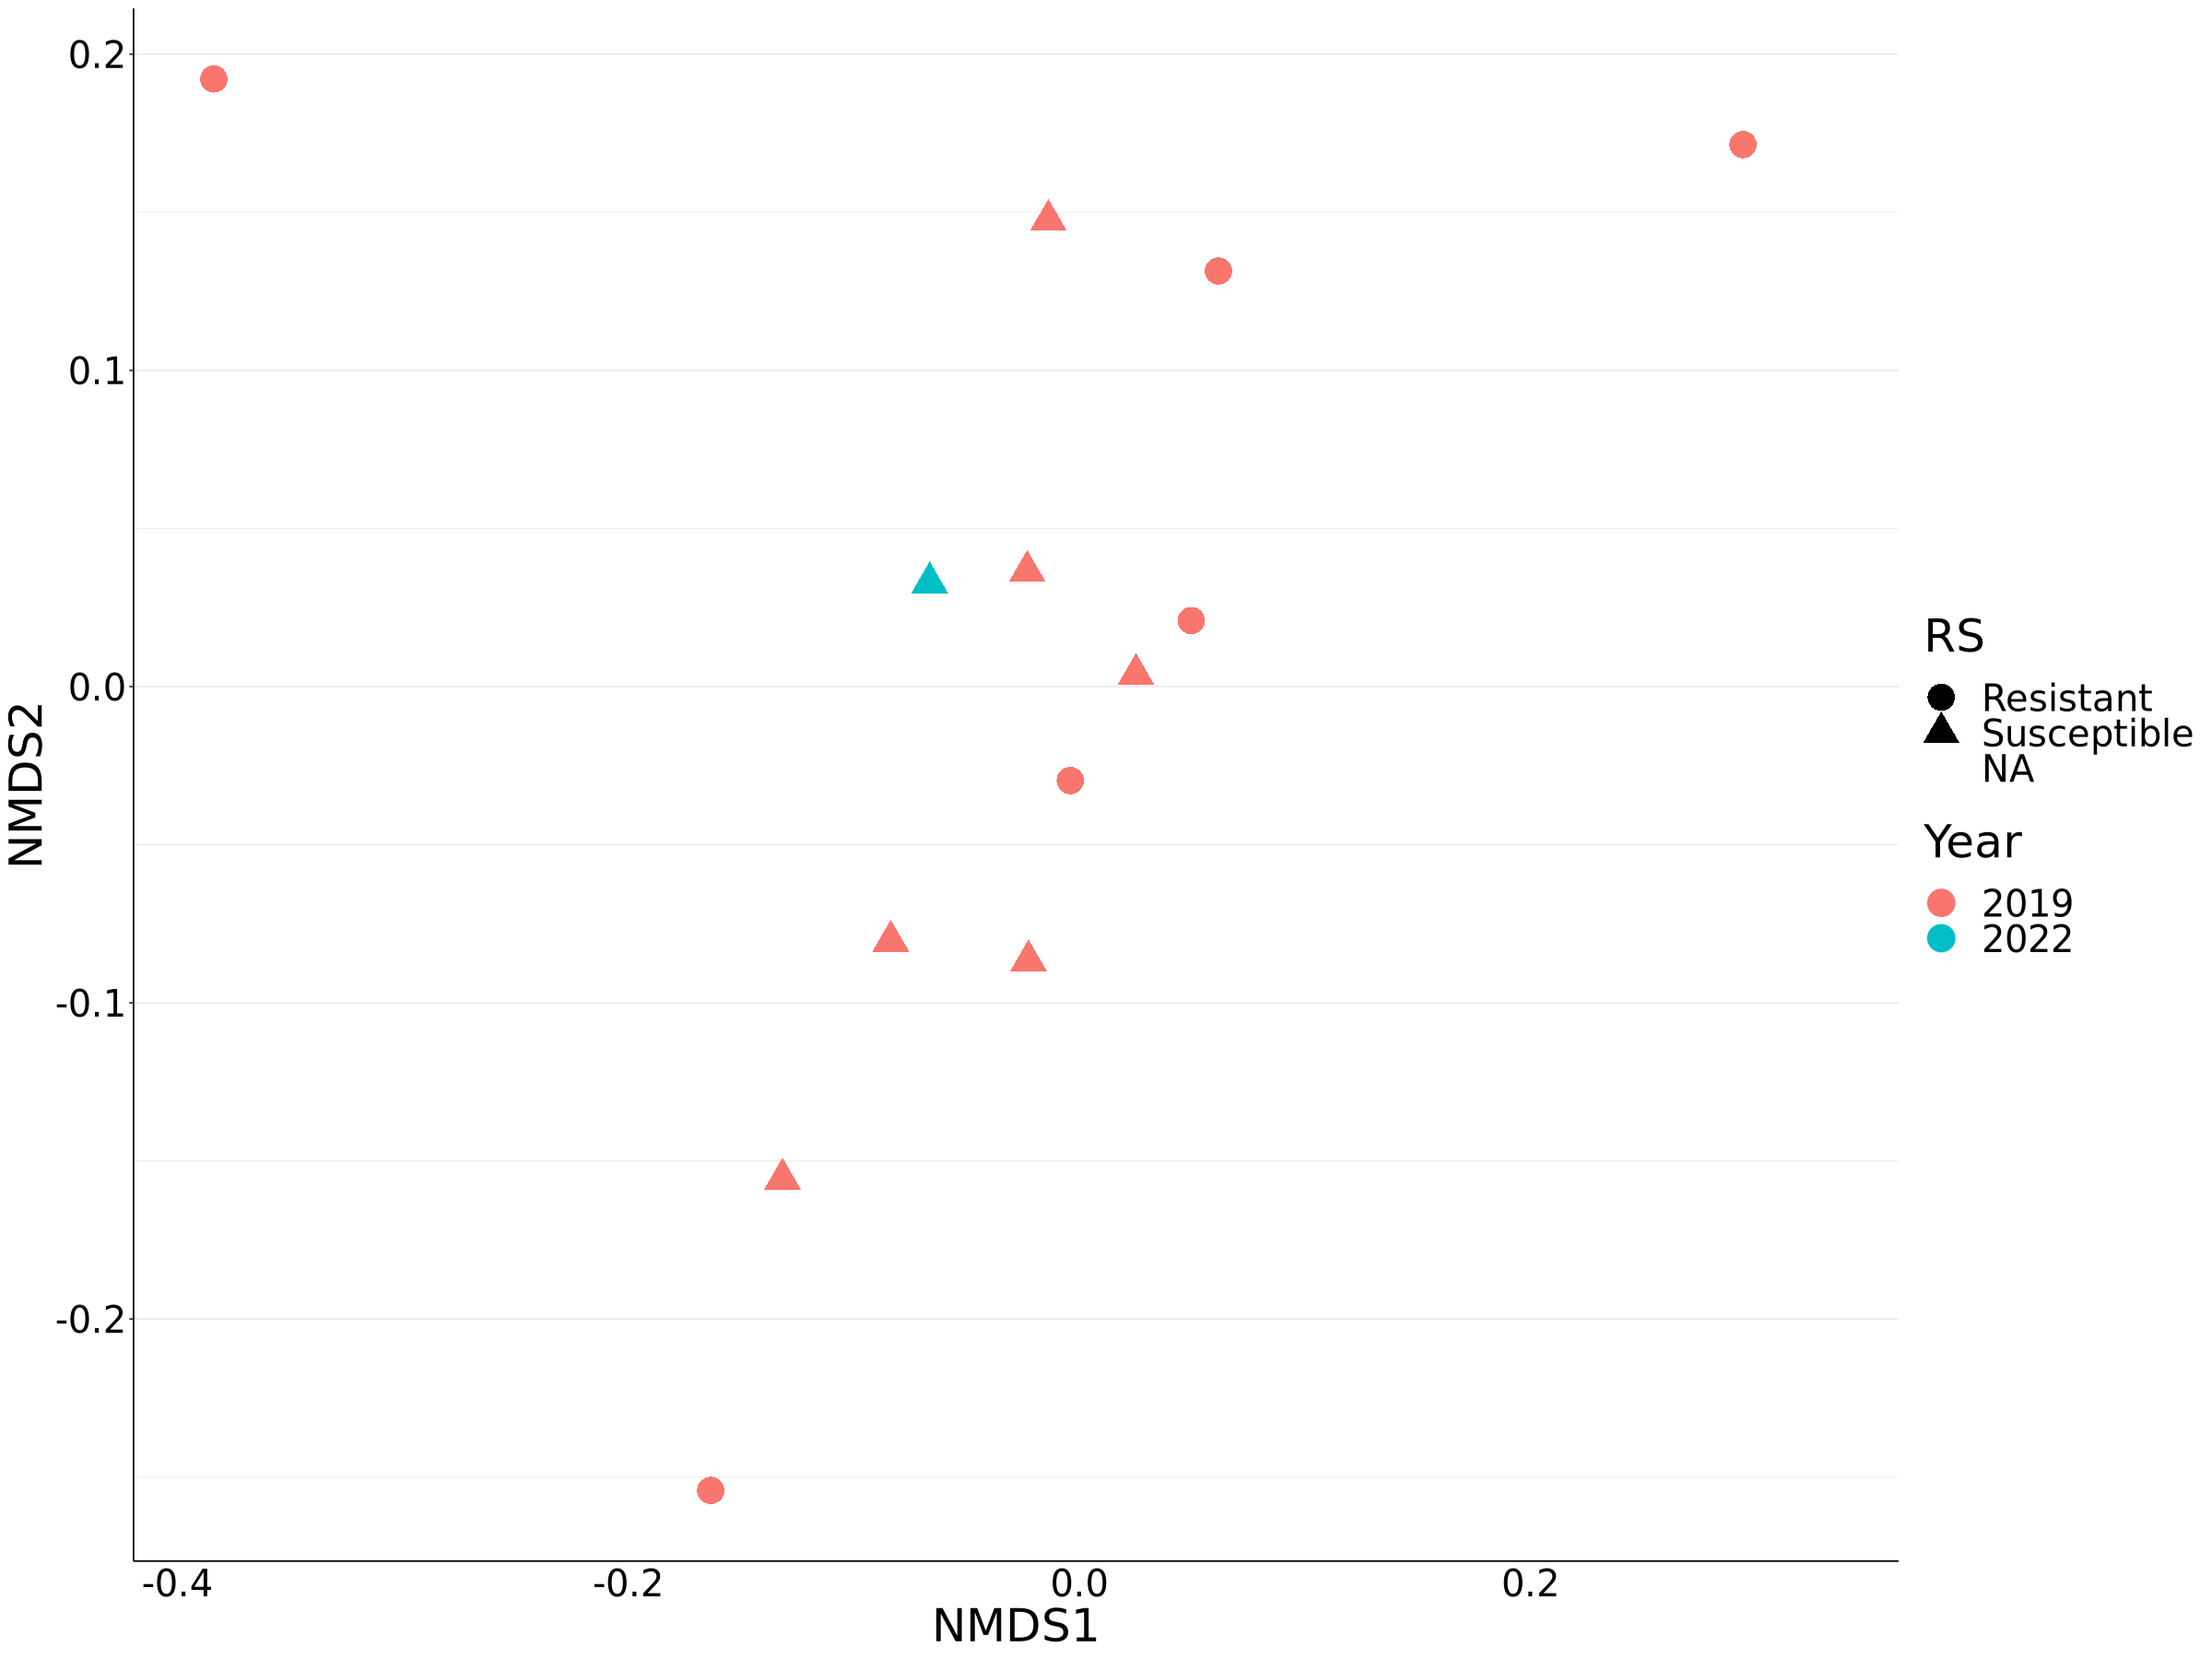

In [108]:
plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="RS")+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [109]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/11272023/figures/PSTR_RS_nMDS.pdf", width = 15, height=10)


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


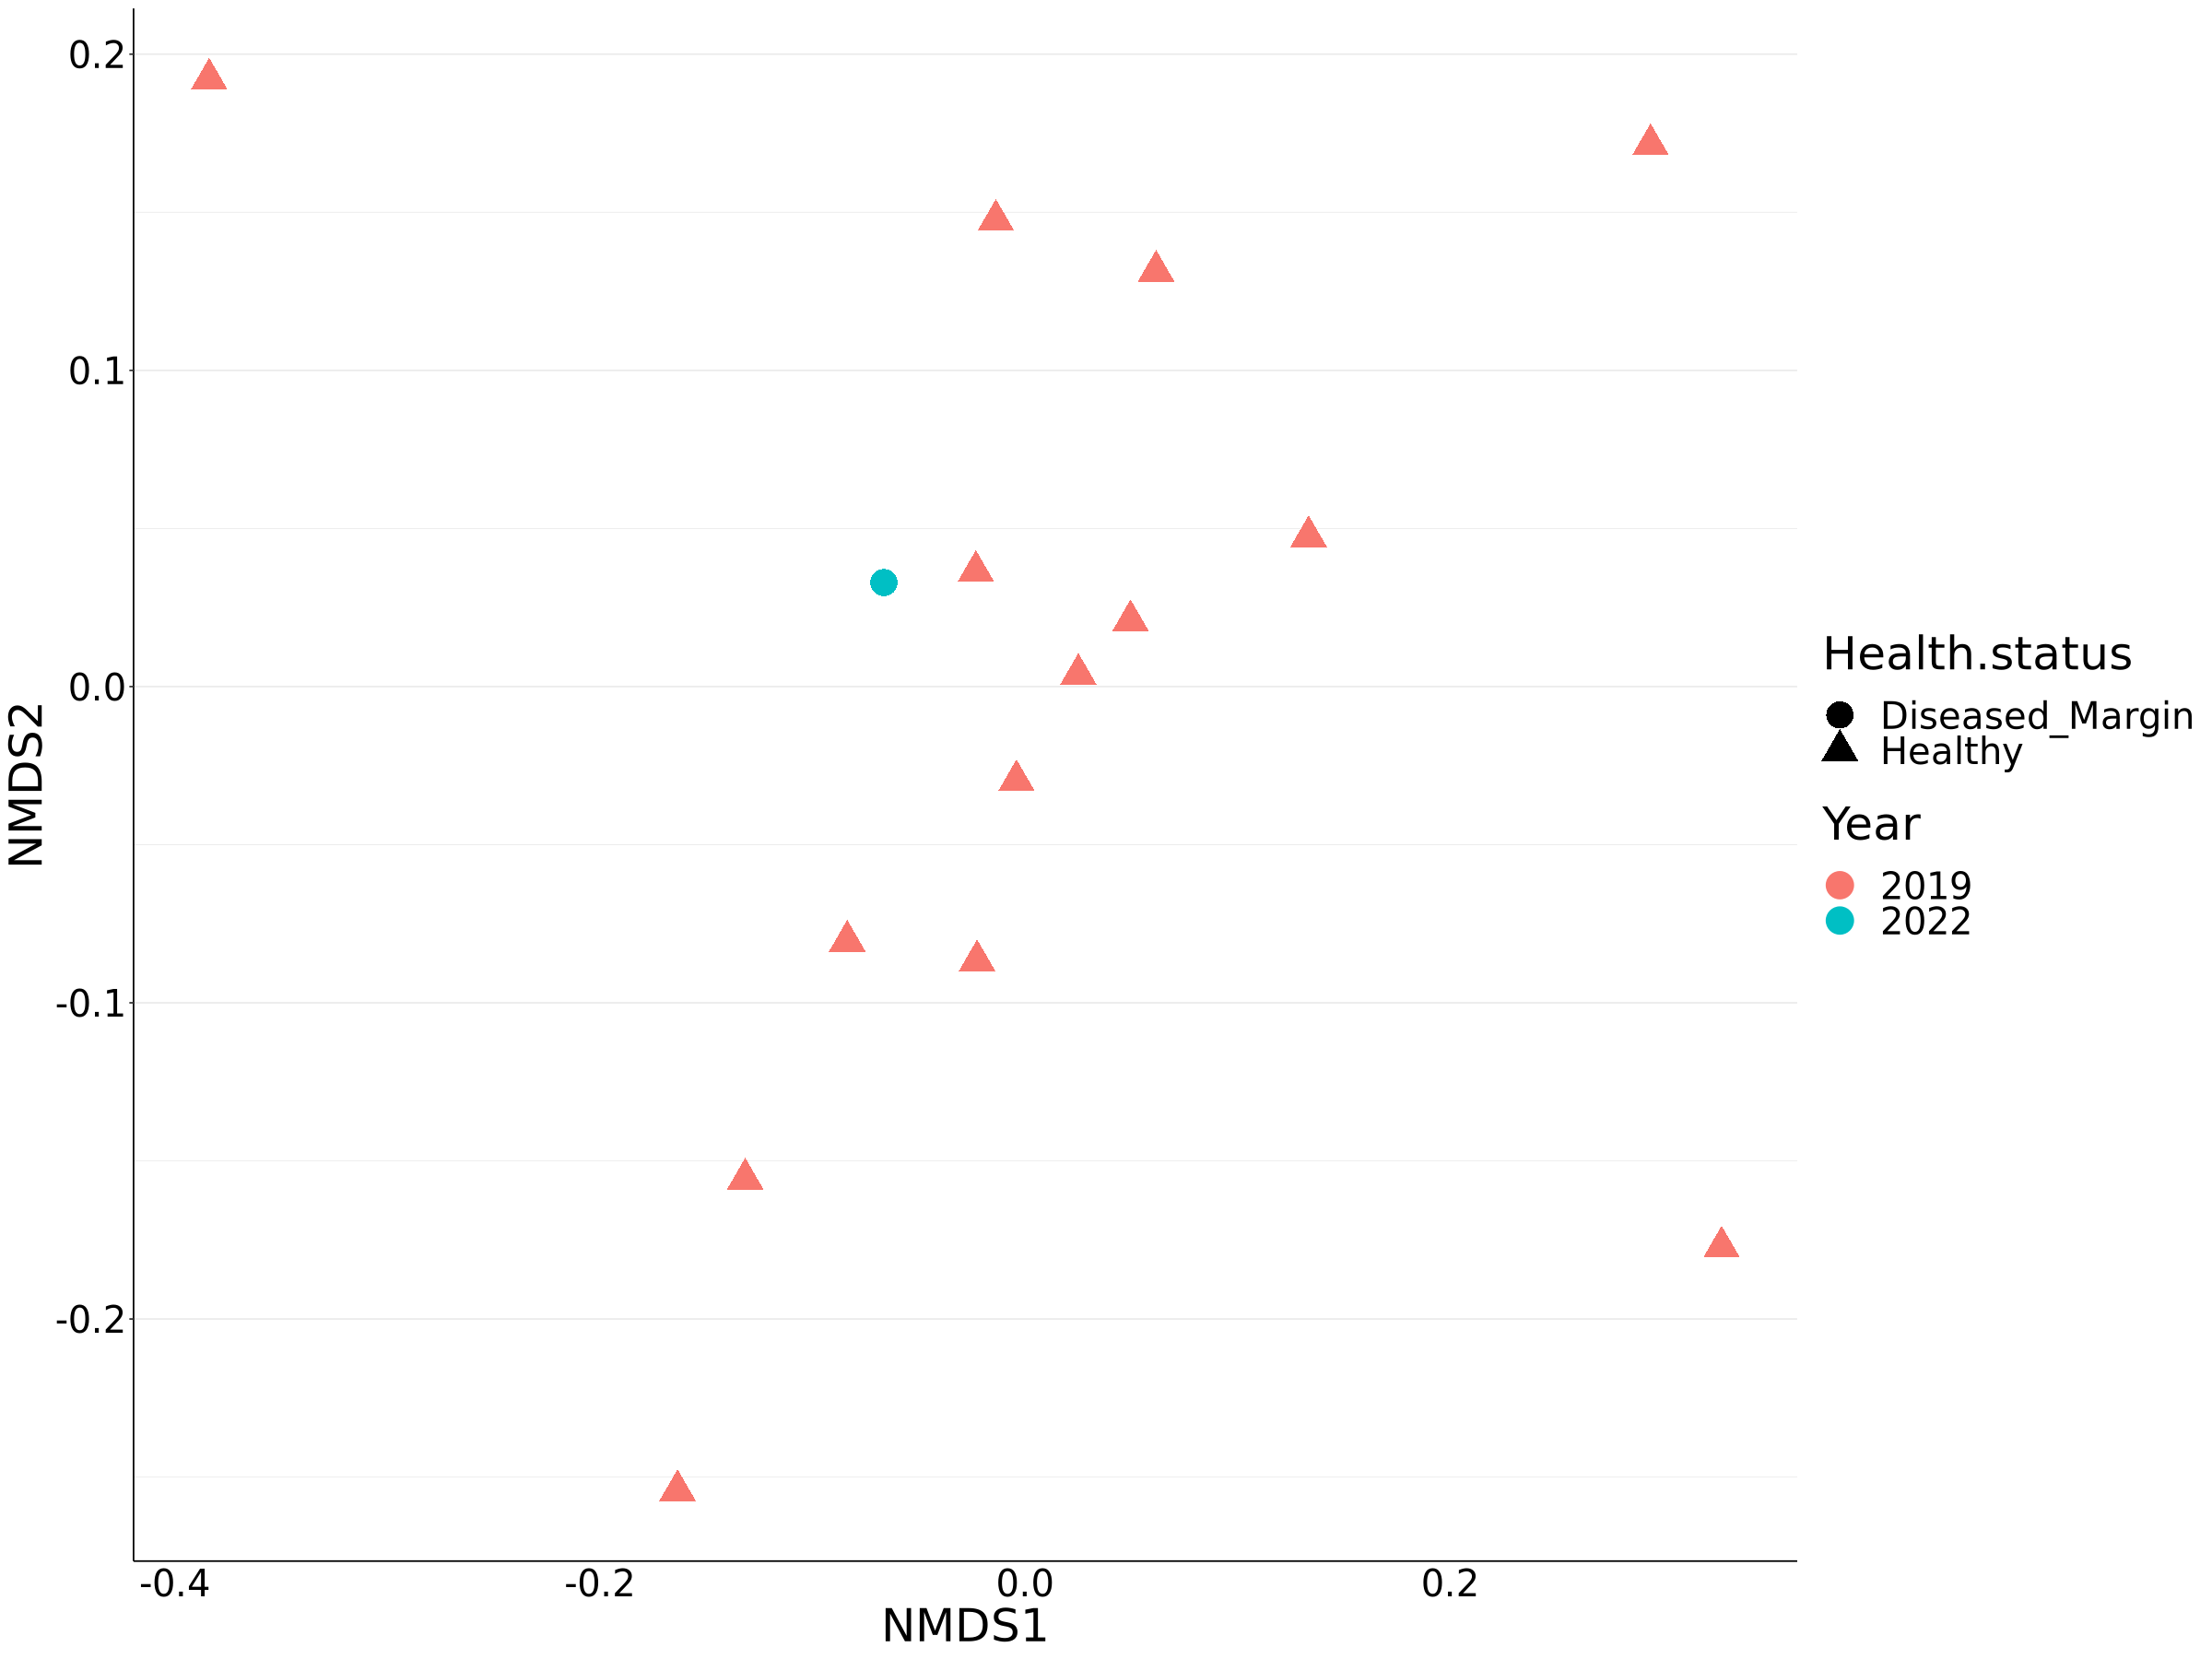

In [110]:
plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="Health.status")+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [111]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/11272023/figures/PSTR_health_status_nMDS.pdf", width = 15, height=10)


In [ ]:
sample_variables(Corals)

In [ ]:
#install.packages('ggplot')
#if (!require("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")

#BiocManager::install("ggplot2")

In [ ]:
#install.packages('RColorBrewer')

In [112]:
library(RColorBrewer)
library(ggplot2)

In [113]:
Corals_10 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:10]), Corals)

In [114]:
Corals_30 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:30]), Corals)

In [115]:
Corals_100 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:100]), Corals)

In [123]:
Corals_300 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:300]), Corals)

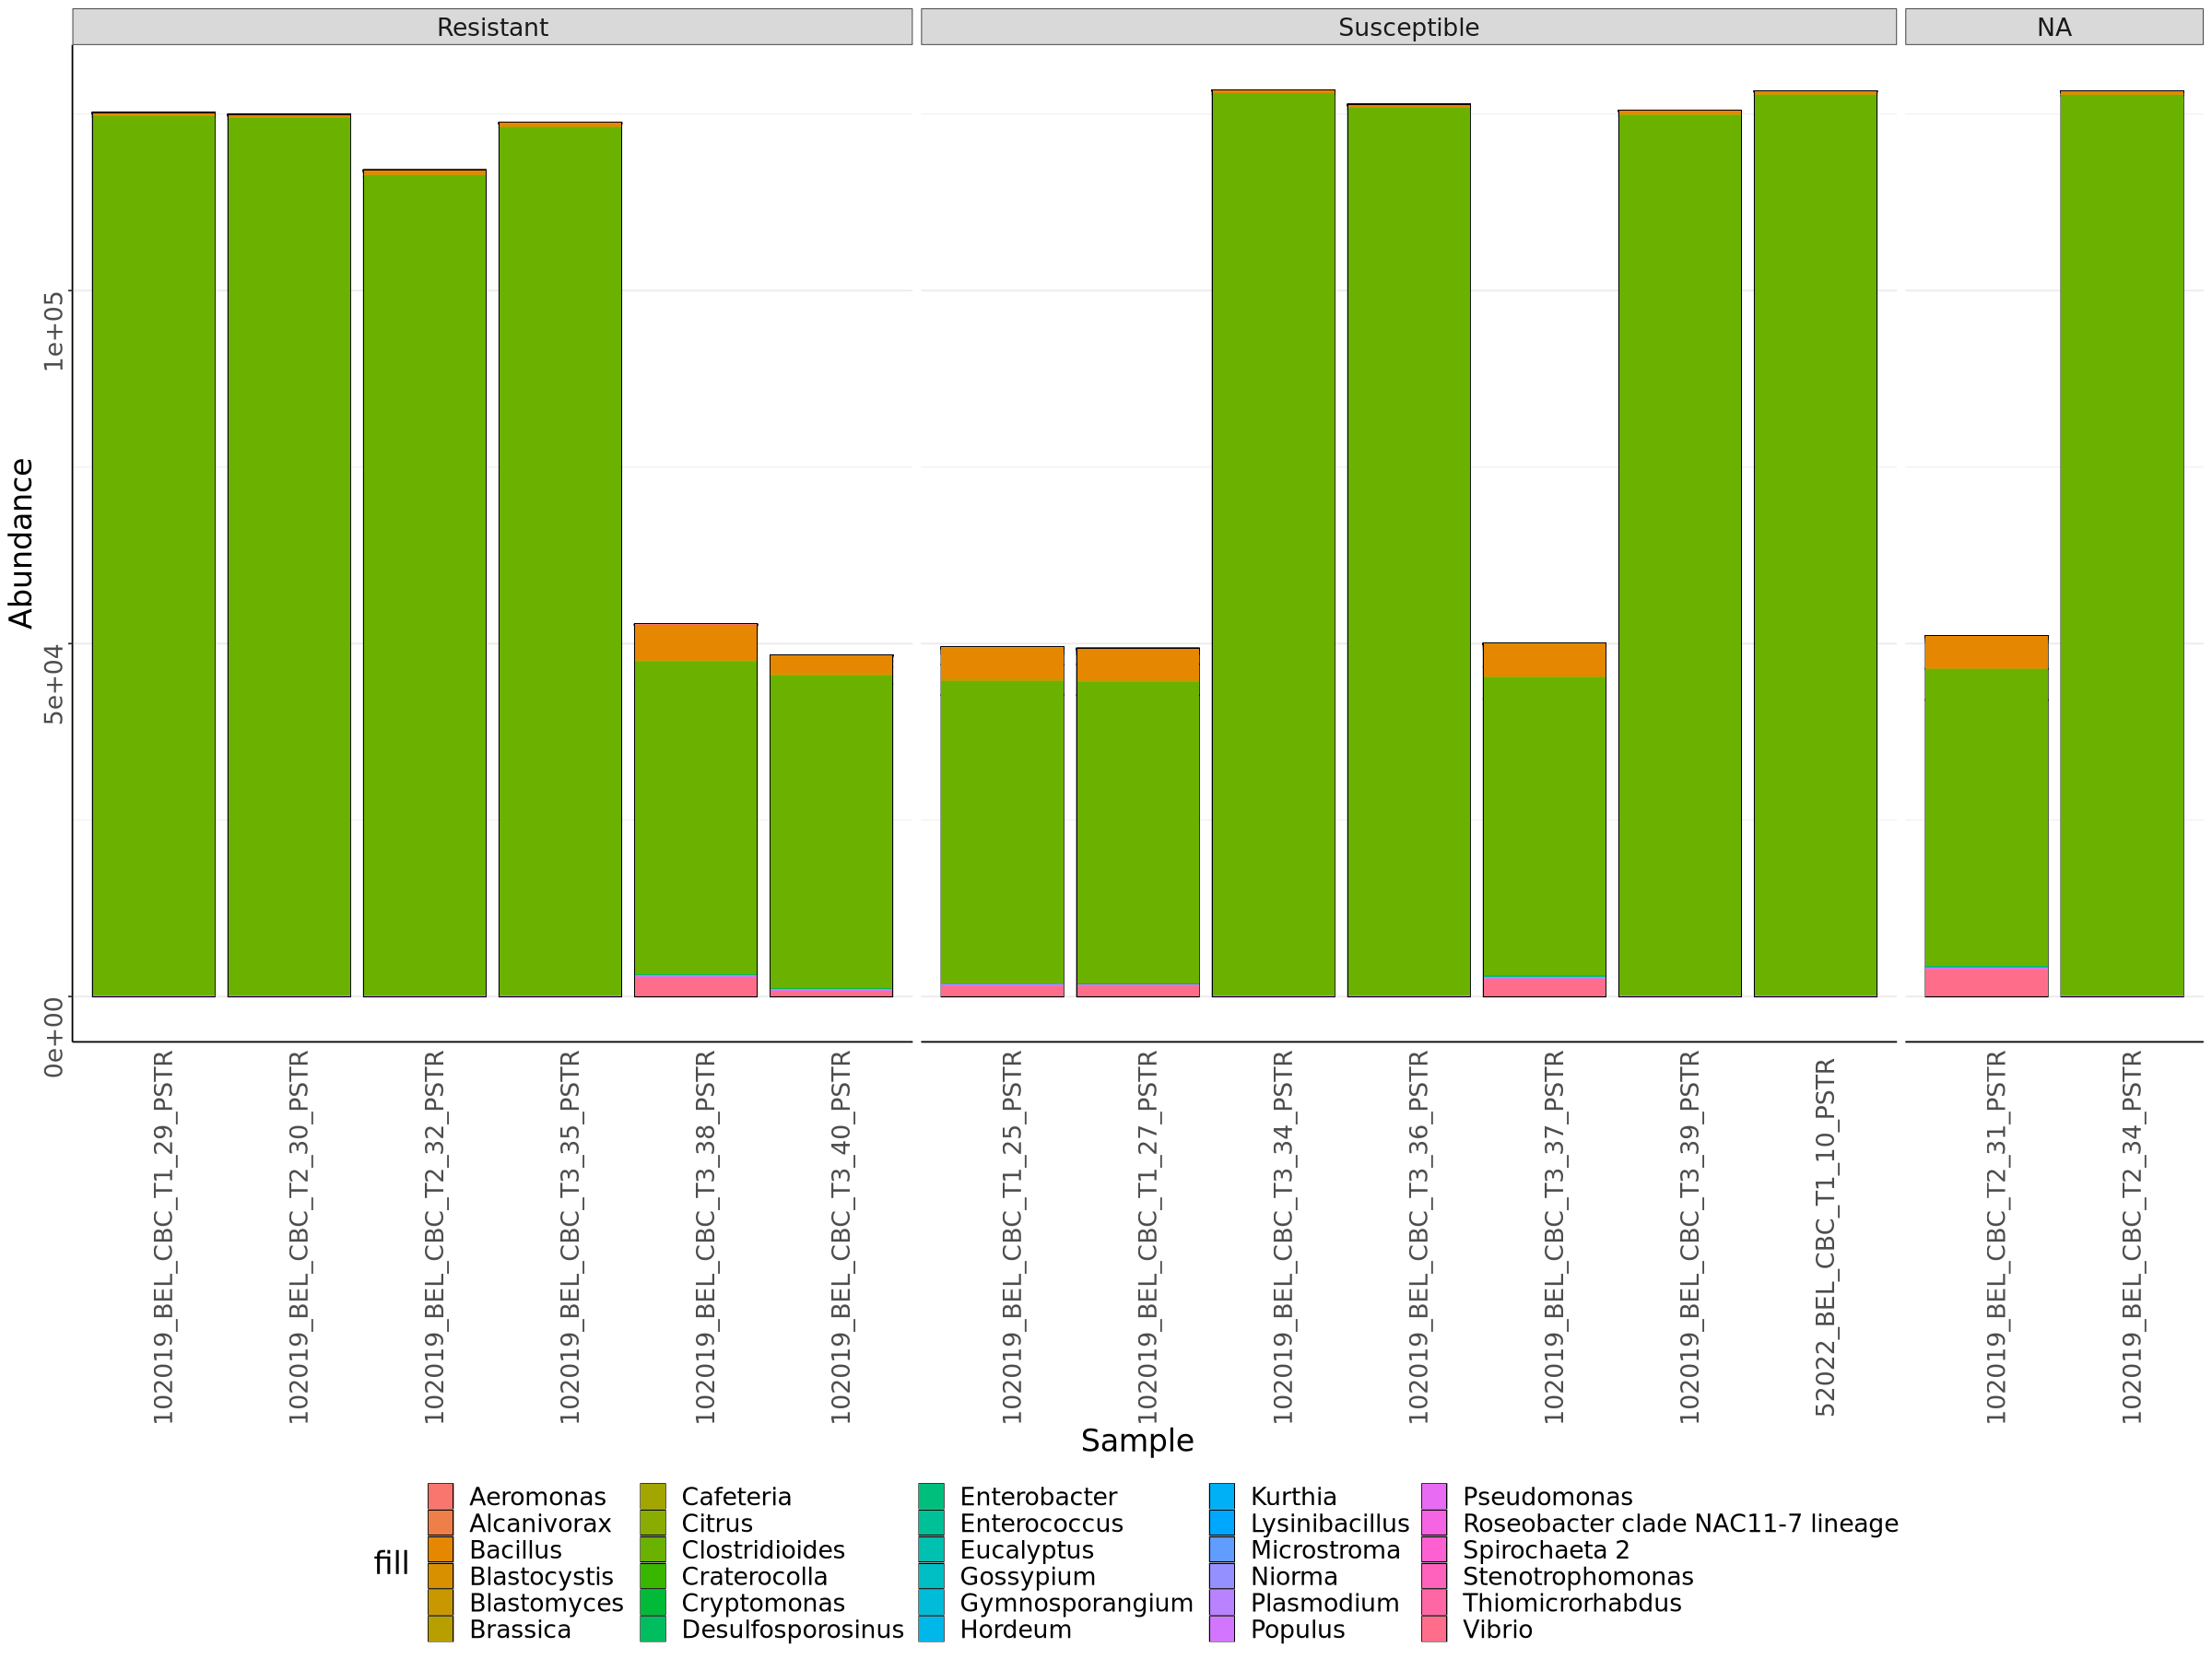

In [127]:
plot_bar(Corals_30)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [126]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/11272023/figures/PSTR_bar_plot30.pdf", width = 15, height=10)

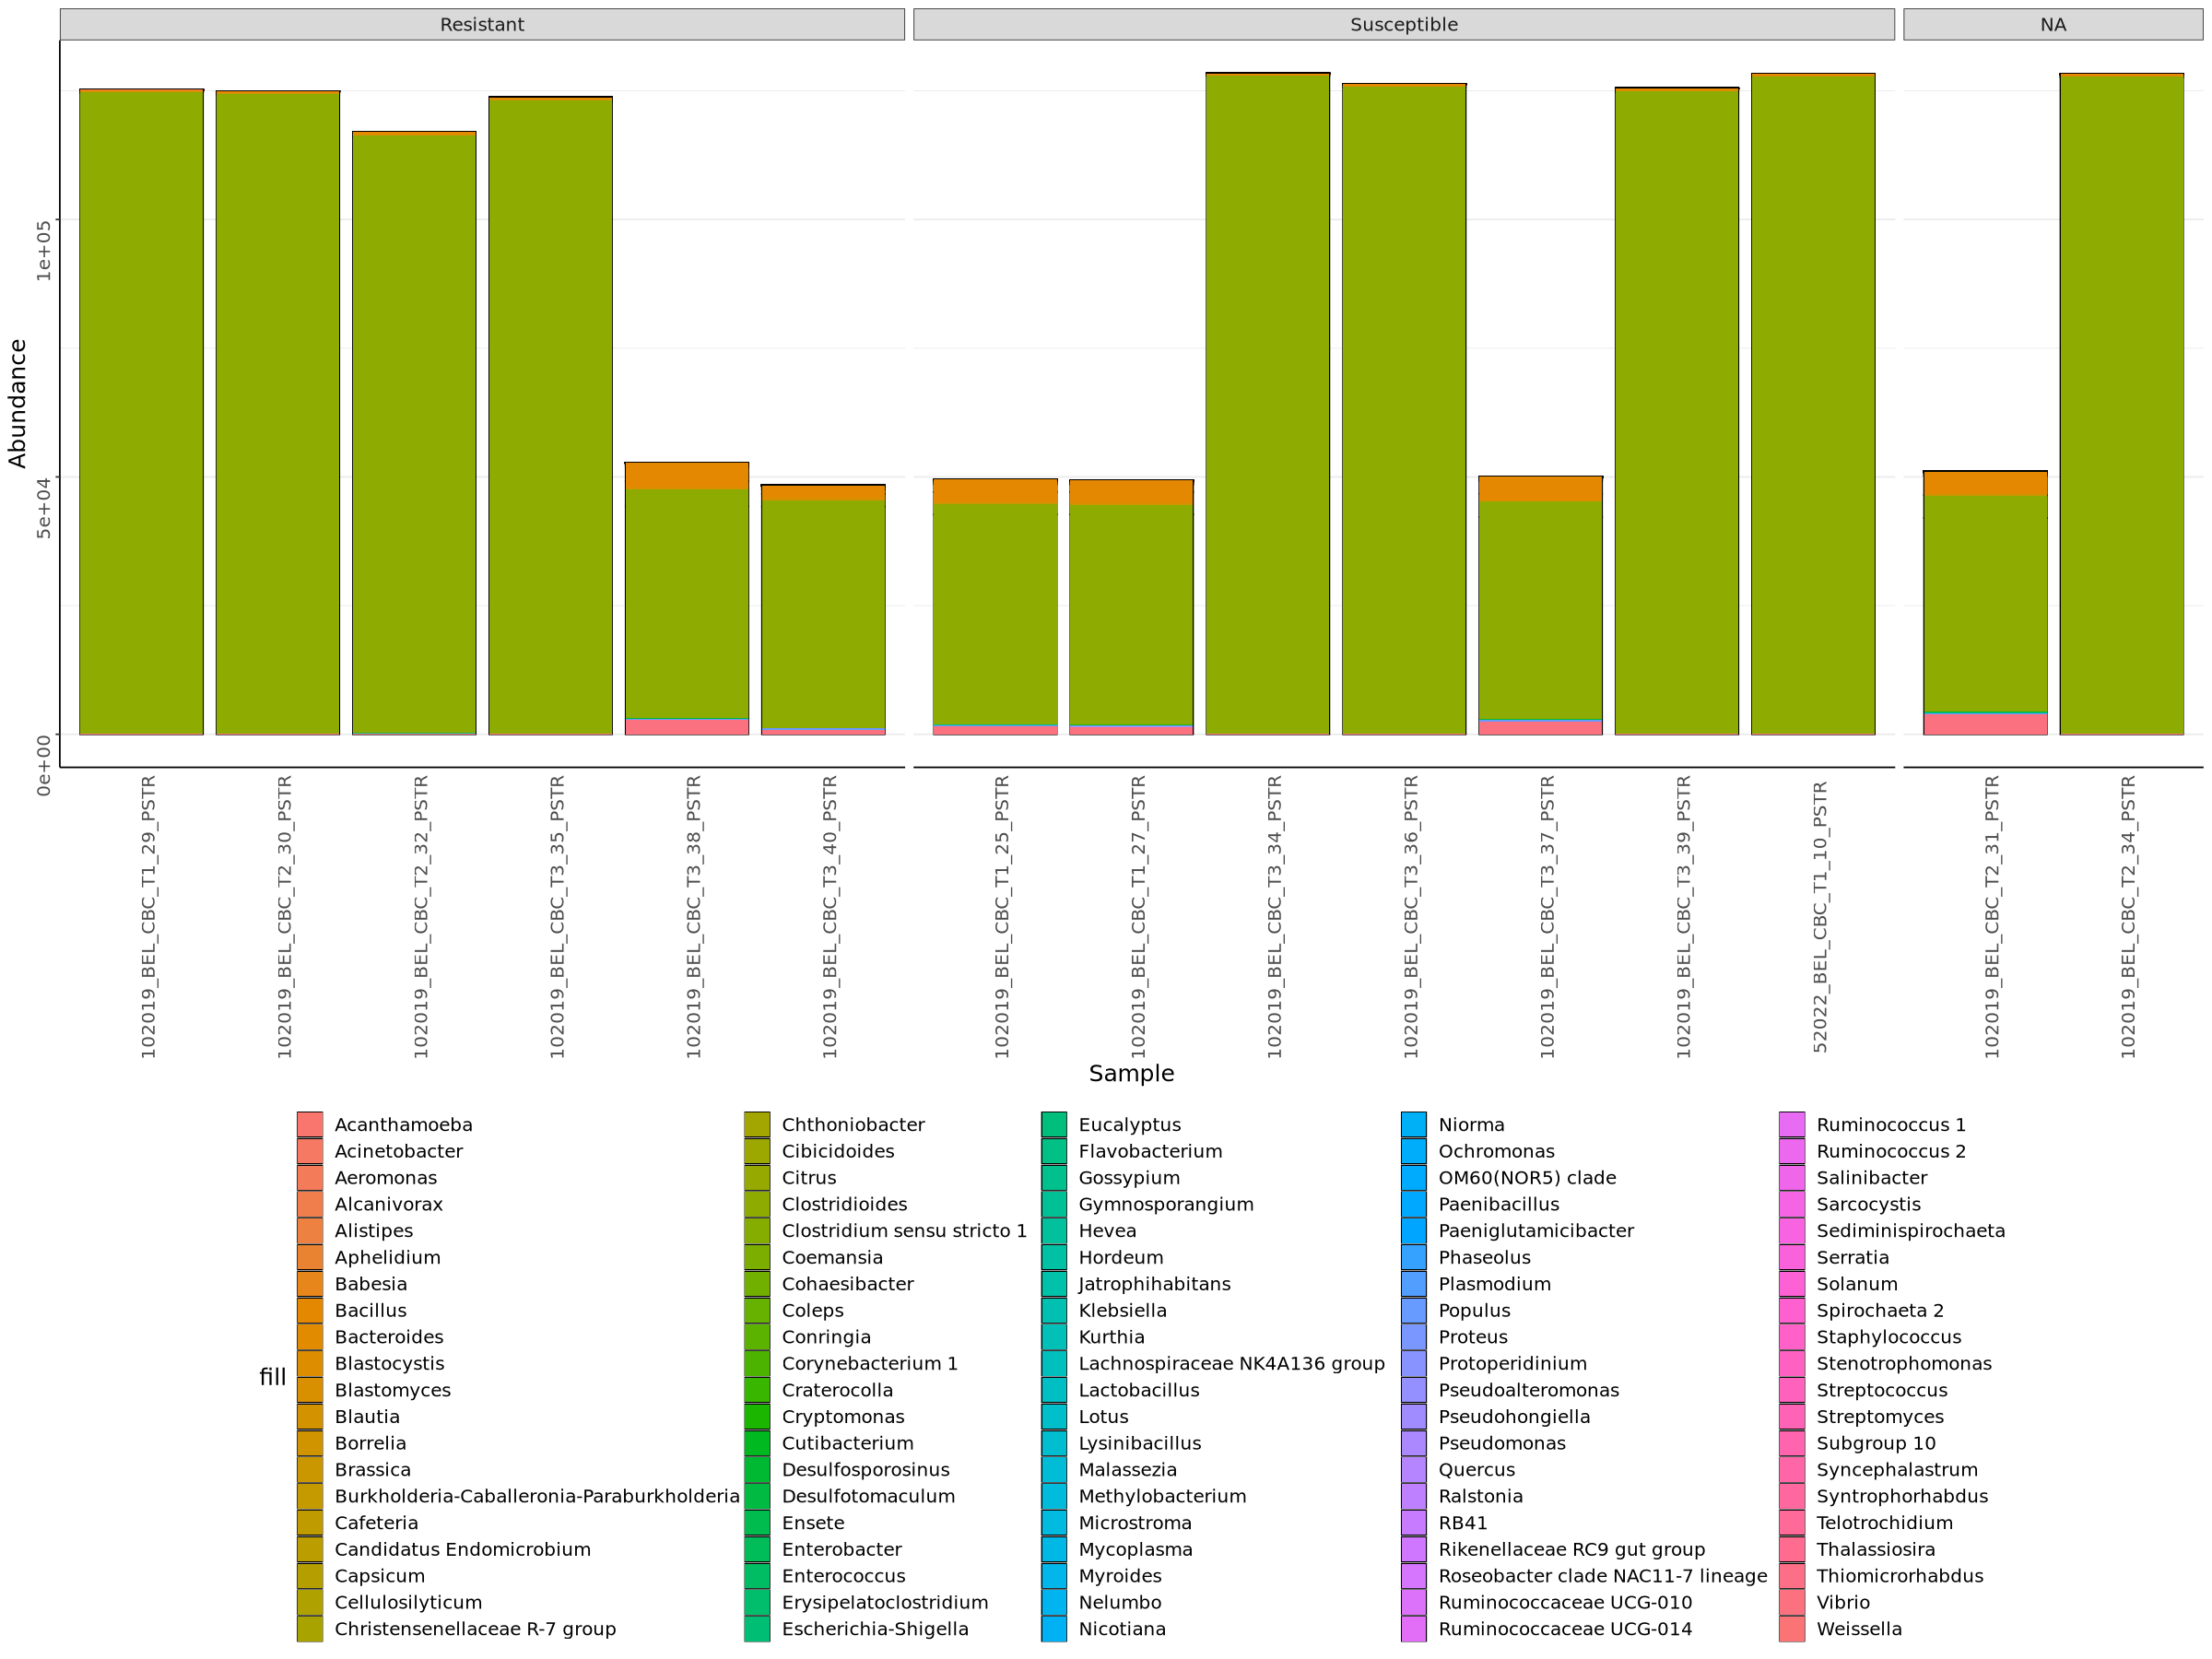

In [118]:
plot_bar(Corals_100)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))

In [119]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/11272023/figures/PSTR_top100_bar_plot.pdf", width = 15, height=10)

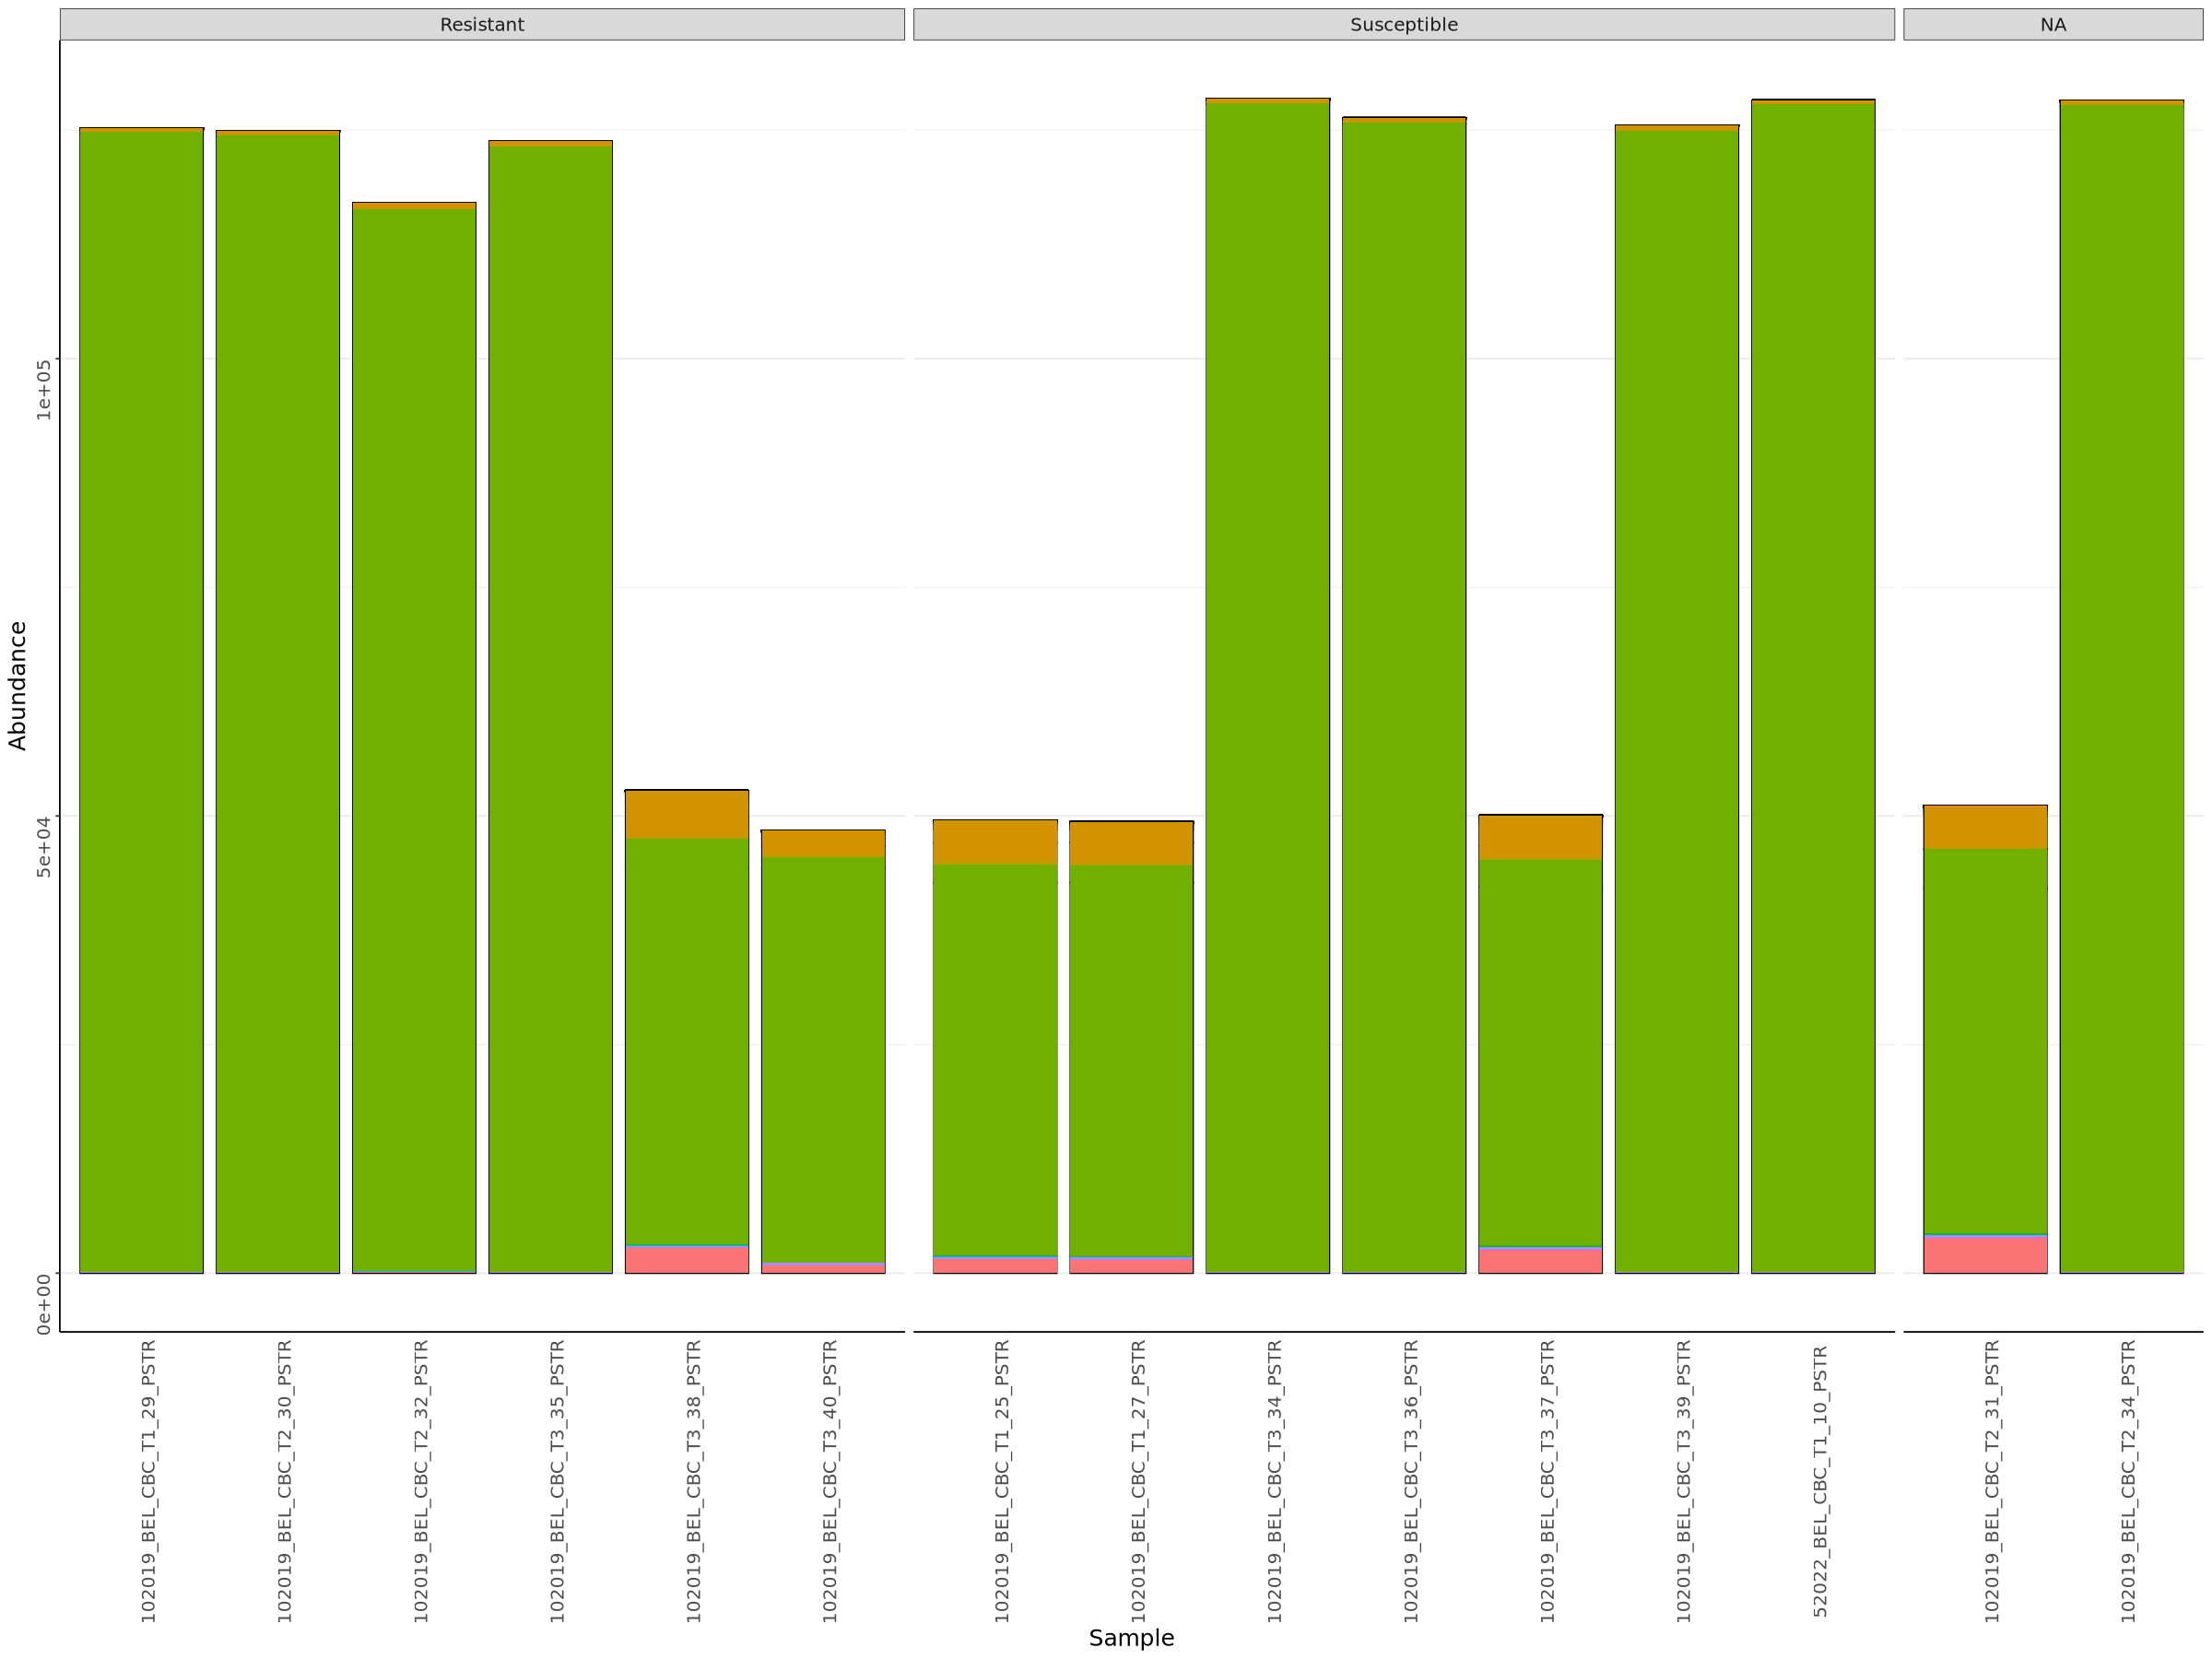

In [125]:
plot_bar(Corals_300)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))

In [ ]:
OTU

In [ ]:
tax_table(Corals)

In [120]:
rich=estimate_richness(Corals)
rich

Warning message in estimate_richness(Corals):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': function accepts only integers (counts)


Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


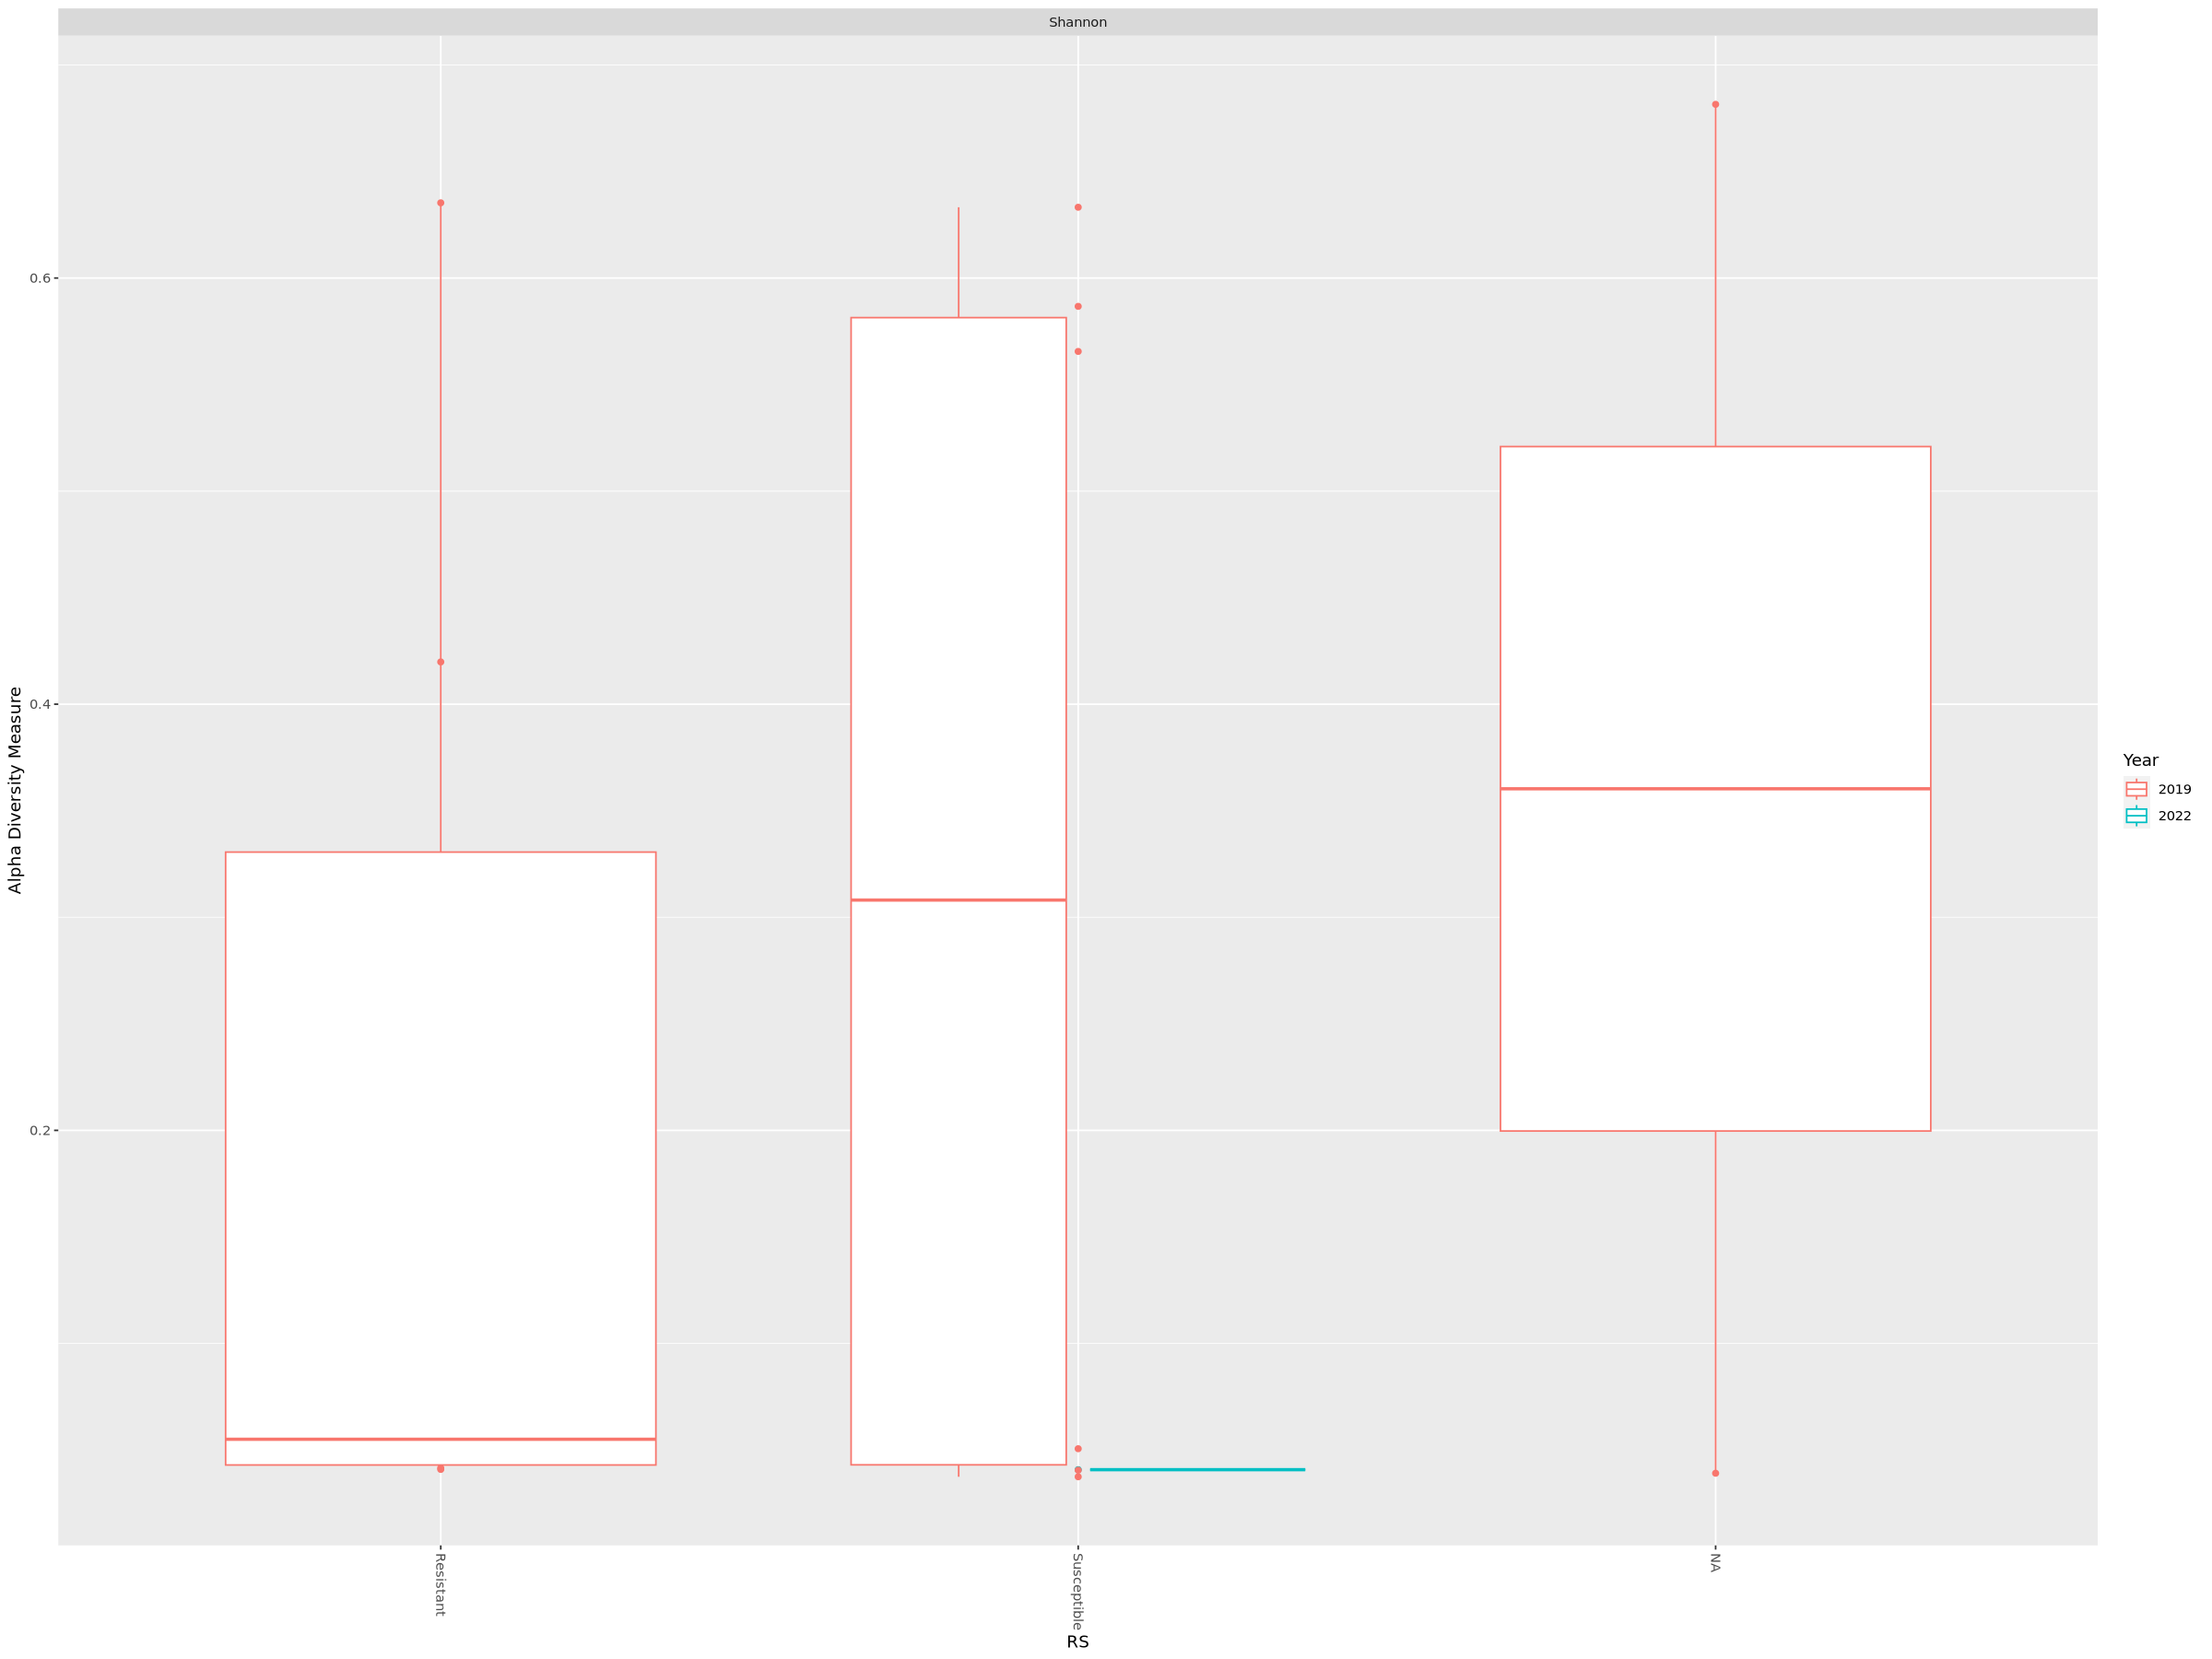

In [121]:

plot_richness(Corals, x="RS", color="Year", measures=c("Shannon")) + geom_boxplot()

In [ ]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/shannon_diversity.pdf", width = 15, height=10)

In [ ]:
# significance in shannon diversity between R v S
pairwise.wilcox.test(rich$Shannon, sample_data(Corals)$RS)

In [ ]:
# DESEQ
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")


In [ ]:
library("DESeq2")

In [ ]:
sample_data(Corals)$RS <- as.factor(sample_data(Corals)$RS)

In [ ]:
# convert phyloseq to deseq obj 
ds = phyloseq_to_deseq2(Corals, ~ RS)
ds = DESeq(ds)

In [ ]:
# filter otus with a false discovery rate cutoff of 0.01
# return significantly differentially abundant otu b/w R v S
alpha = 0.01
res = results(ds, contrast=c("RS", "Resistant", "Susceptible"), alpha=alpha)
res = res[order(res$padj, na.last=NA), ]
res_sig = res[(res$padj < alpha), ]
res_sig

In [ ]:
# plot significantly different OTUs
res_sig = cbind(as(res_sig, "data.frame"), as(tax_table(Corals)[rownames(res_sig), ], "matrix"))
ggplot(res_sig, aes(x=Genus, y=log2FoldChange, color=Genus)) +
    #geom_jitter(size=3, width = 0.2) +
    theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

In [ ]:
plot_bar(Corals)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(color="Genus", fill="Genus"), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [ ]:
# run plotbar on phyloseq obj

In [ ]:
plot_bar(Corals, fill= "Genus")

In [ ]:
data("GlobalPatterns")
gp.ch = subset_taxa(GlobalPatterns, Phylum == "Chlamydiae")


In [ ]:
plot_bar(Corals)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(color=ta1, fill=ta1), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [ ]:
#Example: 
DE17_100 = prune_taxa(names(sort(taxa_sums(DE17),TRUE)[1:100]), DE17)
plot_bar(DE17_100, fill="Family")+
theme_bw()+
scale_fill_manual(values=mycolors)+
theme(legend.position = "right", text = element_text(size=18), axis.text.x = element_blank())+
facet_grid(.~Site, scales="free_x")

In [ ]:
plot_bar(Corals,  fill="ta1") +
geom_bar(aes(color="ta1", fill="ta1"), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))

In [ ]:
plot_bar(Corals, fill=OTU)+
theme_bw()+
theme(legend.position = "right", text = element_text(size=18), axis.text.x = element_blank())+
facet_grid(.~RS, scales="free_x")

#### Trying something other than phyloseq

In [ ]:
#install.packages("reshape2")
library(ggplot2)
library(reshape2)

In [ ]:
# keep top 100 otus
otus_sorted <- otu_table[1:100, ]
dim(otus_sorted)

In [ ]:
otu_t <- t(otus_sorted)
head(otu_t)

In [ ]:
rownames=rownames(otu_t)
rownames

In [ ]:

pcm = melt(otus_sorted, id=rownames)
pcm

In [ ]:
colnames(pcm)=c("otu","sample","count")

In [ ]:
#make the plot!
mx = ggplot(pcm, aes(x = sample, fill = otu, y = count)) + 
    geom_bar(stat = "identity", colour = "black") + 
    theme(axis.text.x = element_text(angle = 90, size = 14, colour = "black", vjust = 0.5, hjust = 1, face= "bold"), 
    axis.title.y = element_text(size = 16, face = "bold"), legend.title = element_text(size = 16, face = "bold"), 
    legend.text = element_text(size = 12, face = "bold", colour = "black"), 
    axis.text.y = element_text(colour = "black", size = 12, face = "bold")) + 
    scale_y_continuous(expand = c(0,0)) + 
    labs(x = "", y = "Relative Abundance (%)", fill = "OTU") + 
    scale_fill_manual(values = colours)
    
mx

In [ ]:
ggplot(pcm, aes(x = sample, fill = otu, y = count))+ 
    geom_bar(stat = "identity", colour = "black") 